## Step 1: Reading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Suppressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [ ]:
try:
  clothesData = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data archive/Dataset 6/clothes_price_prediction_data.csv')

except:
  clothesData = pd.read_csv('/content/drive/MyDrive/Capstone project/kaggle_data/clothes_price_prediction_data.csv')

In [ ]:
print("This is the shape of the data frame", clothesData.shape)

# Data Cleaning
clothesData.dropna(inplace=True)
print("This is the shape of the data frame after cleaning empty values", clothesData.shape)
clothesData.drop_duplicates(inplace=True)
print("This is the shape of the data frame after cleaning duplicated values", clothesData.shape)

This is the shape of the data frame (1000, 6)
This is the shape of the data frame after cleaning empty values (1000, 6)
This is the shape of the data frame after cleaning duplicated values (1000, 6)


In [ ]:
clothesData.head(10)

,Brand,Category,Color,Size,Material,Price
0,New Balance,Dress,White,XS,Nylon,182
1,New Balance,Jeans,Black,XS,Silk,57
2,Under Armour,Dress,Red,M,Wool,127
3,Nike,Shoes,Green,M,Cotton,77
4,Adidas,Sweater,White,M,Nylon,113
5,Reebok,Jacket,Red,XL,Nylon,19
6,Puma,Jacket,Red,XXL,Polyester,31
7,Adidas,Dress,Red,XS,Denim,46
8,Reebok,Dress,Black,S,Wool,97
9,Adidas,Jeans,Yellow,L,Wool,80


## Key observations from step one
The data frame has 6 categories, with 1000 rows of data. There were no duplicate or empty values that needed to be cleaned.

* Brand:      The brand of clothing
* Category:   The category of the clothing item
* Color:      The colour of the clothing item
* Size:       The size of the clothing item
* Material:   The main material used to create the item
* Price:      The price of the item

* This file contains information on 1000 different clothing items
* There are 6 data attributes and they are outlined below:
* Brand - The brand of clothing
* Category - The type of clothing
* Color - The color of the clothing item
* Size - The size of the clothing item
* Material - The material of the item
* Price - The sell price of the item



## Step 2: Problem statement definition

* To predict the price of a clothing item based on the other categories

## Step 3: Target Variable Identification

* The target variable will be Price

* Brand, Category, Color, Size and Material will be the independent variables for now

## Step 4: Visualising the distribution of target variable

<Axes: ylabel='Frequency'>

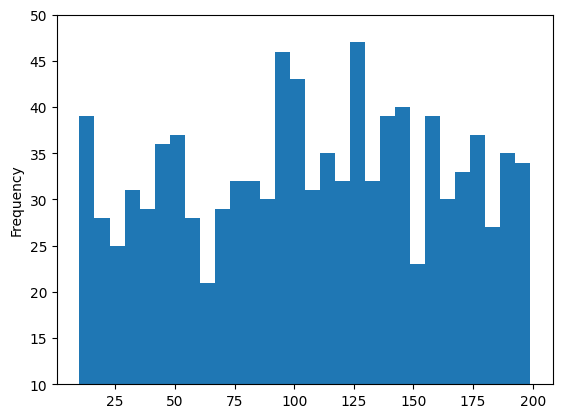

In [ ]:
clothesData["Price"].plot.hist(ylim=(10,50), bins=30)

## Step 5: Data Exploration on a basic level

In [ ]:
clothesData["Price"].median()

108.0

In [ ]:
# Printing information about the Price category
clothesData["Price"].describe()

,Price
count,1000.000000
mean,106.289000
std,53.695444
min,10.000000
25%,59.750000
50%,108.000000
75%,150.000000
max,199.000000


In [ ]:
clothesData.nunique()

,0
Brand,6
Category,6
Color,6
Size,6
Material,6
Price,190


### Observations of this data:


* Brand - Categorical
* Category - Categorical
* Color - Categorical
* Size - Categorical
* Material - Categorical
* Price - Continuous


In [ ]:
# Printing a sample of the data
clothesData.head(10)

,Brand,Category,Color,Size,Material,Price
0,New Balance,Dress,White,XS,Nylon,182
1,New Balance,Jeans,Black,XS,Silk,57
2,Under Armour,Dress,Red,M,Wool,127
3,Nike,Shoes,Green,M,Cotton,77
4,Adidas,Sweater,White,M,Nylon,113
5,Reebok,Jacket,Red,XL,Nylon,19
6,Puma,Jacket,Red,XXL,Polyester,31
7,Adidas,Dress,Red,XS,Denim,46
8,Reebok,Dress,Black,S,Wool,97
9,Adidas,Jeans,Yellow,L,Wool,80


In [ ]:
clothesData.tail(10)

,Brand,Category,Color,Size,Material,Price
990,Nike,Jacket,Green,M,Silk,12
991,Under Armour,Jacket,Red,XL,Silk,18
992,Puma,Sweater,Blue,S,Cotton,20
993,Puma,Sweater,Green,XXL,Cotton,15
994,New Balance,Jeans,Black,M,Polyester,48
995,Puma,Jeans,Black,L,Polyester,176
996,Puma,Jacket,Red,XXL,Silk,110
997,Reebok,Sweater,Blue,XS,Denim,127
998,Under Armour,Sweater,Black,XXL,Denim,69
999,New Balance,Jacket,Yellow,XS,Wool,174


In [ ]:
clothesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Brand     1000 non-null   object
 1   Category  1000 non-null   object
 2   Color     1000 non-null   object
 3   Size      1000 non-null   object
 4   Material  1000 non-null   object
 5   Price     1000 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 47.0+ KB


In [ ]:
clothesData.describe(include="all")

,Brand,Category,Color,Size,Material,Price
count,1000,1000,1000,1000,1000,1000.000000
unique,6,6,6,6,6,NaN
top,Under Armour,Jacket,Yellow,XS,Polyester,NaN
freq,179,191,173,196,175,NaN
mean,NaN,NaN,NaN,NaN,NaN,106.289000
std,NaN,NaN,NaN,NaN,NaN,53.695444
min,NaN,NaN,NaN,NaN,NaN,10.000000
25%,NaN,NaN,NaN,NaN,NaN,59.750000
50%,NaN,NaN,NaN,NaN,NaN,108.000000
75%,NaN,NaN,NaN,NaN,NaN,150.000000


## Step 6: Identifying and rejecting useless columns

* Not much of a correlation between categories
* Material barely has any correlation with Price

## Step 7: Visual Exploratory Data Analysis of Data

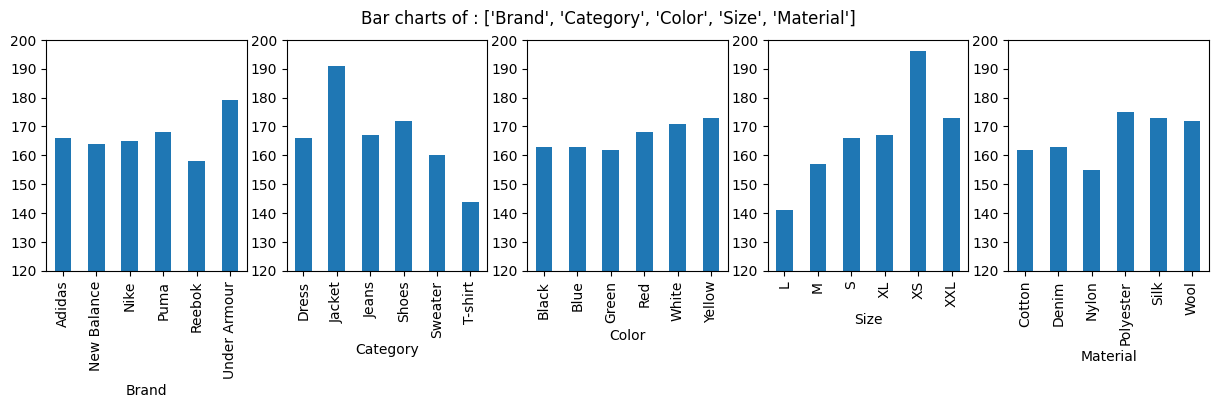

In [ ]:
# Bar Graphs of each qualitative data column
def PlotBarCharts(inpData, colsToPlot):
  %matplotlib inline

  # Generating multiple subplots
  fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(15, 3))
  fig.suptitle("Bar charts of : " + str(colsToPlot))

  # Looping through the columns

  for colName, plotnumber in zip(colsToPlot, range(len(colsToPlot))):
    # Plotting the bar chart
    subPlot[plotnumber].set_ylim(120, 200)
    inpData.groupby(colName).size().plot(kind="bar", ax=subPlot[plotnumber])

PlotBarCharts(inpData=clothesData, colsToPlot=["Brand", "Category", "Color", "Size", "Material"])

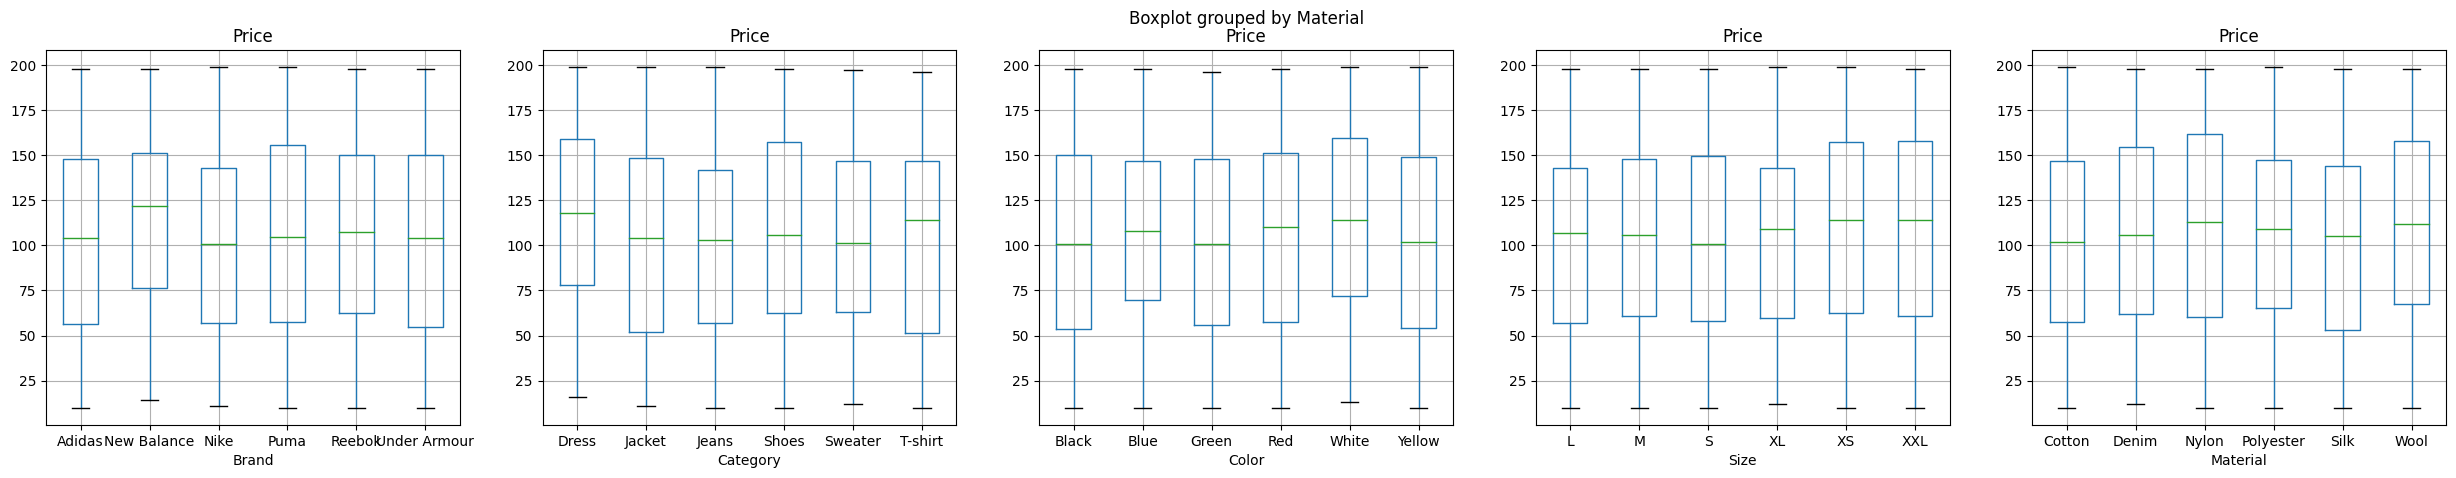

In [ ]:
# Box plots for continuous Target Variable "Price" and Categorical predictors
CategoricalColsList=["Brand", "Category", "Color", "Size", "Material"]
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(30,5))
# Creating box plots for each continuous predictor against the Target Variable "MEDV"
for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
  clothesData.boxplot(column='Price', by=PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])

There does not seem to be much of a correlation between Price and any of the categorical predictors...

## Step 8: Feature Selection based on Data Distribution

## Step 9: Removal of Outliers and Missing Values

In [ ]:
# Finding how many missing values are there for each column
clothesData.isnull().sum()

,0
Brand,0
Category,0
Color,0
Size,0
Material,0
Price,0


## Step 10: Converting strings to int for correlation analysis and machine learning algorithms

In [ ]:
# For testing cat codes by giving each category a value from 0 to 5
for category in clothesData.columns:
  if clothesData[category].dtype == 'object':
    clothesData[category] = clothesData[category].astype('category')
    clothesData[category] = clothesData[category].cat.codes
    clothesData[category] = clothesData[category].astype('int64')
clothesData.to_csv('clothesData.csv', index=False)
print("File created")
clothesData.head(10)

File created


,Brand,Category,Color,Size,Material,Price
0,1,0,4,4,2,182
1,1,2,0,4,4,57
2,5,0,3,1,5,127
3,2,3,2,1,0,77
4,0,4,4,1,2,113
5,4,1,3,3,2,19
6,3,1,3,5,3,31
7,0,0,3,4,1,46
8,4,0,0,2,5,97
9,0,2,5,0,5,80


In [ ]:
# Convert clothesData to logistical boolean data
# To dummies
clothesDataNumeric = pd.get_dummies(clothesData, columns=['Brand', 'Category', 'Color', 'Size', 'Material'])
clothesDataNumeric.head(10)
clothesData.to_csv('clothesDataNumeric.csv', index=False)
print("File created")
clothesDataNumeric.head(10)

File created


,Price,Brand_Adidas,Brand_New Balance,Brand_Nike,Brand_Puma,Brand_Reebok,Brand_Under Armour,Category_Dress,Category_Jacket,Category_Jeans,...,Size_S,Size_XL,Size_XS,Size_XXL,Material_Cotton,Material_Denim,Material_Nylon,Material_Polyester,Material_Silk,Material_Wool
0,182,False,True,False,False,False,False,True,False,False,...,False,False,True,False,False,False,True,False,False,False
1,57,False,True,False,False,False,False,False,False,True,...,False,False,True,False,False,False,False,False,True,False
2,127,False,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,True
3,77,False,False,True,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,113,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
5,19,False,False,False,False,True,False,False,True,False,...,False,True,False,False,False,False,True,False,False,False
6,31,False,False,False,True,False,False,False,True,False,...,False,False,False,True,False,False,False,True,False,False
7,46,True,False,False,False,False,False,True,False,False,...,False,False,True,False,False,True,False,False,False,False
8,97,False,False,False,False,True,False,True,False,False,...,True,False,False,False,False,False,False,False,False,True
9,80,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True


## Step 11: Visual and Statistic Correlation Analysis for Selection of Best Features

In [ ]:
# Calculating correlation matrix

# Creating the correlation matrix
CorrelationData=clothesDataNumeric.corr()
CorrelationData
CategoricalPredictorList=clothesDataNumeric.columns.tolist()
CategoricalPredictorList.remove('Price')

In [ ]:
# Defining a function to find the statistical relationship with all the categorical variables

def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
  from scipy.stats import f_oneway
  # Creating an empty list of final selected predictors
  SelectedPredictors=[]

  print('##### ANOVA Results ##### \n')
  for predictor in CategoricalPredictorList:
    CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
    AnovaResults = f_oneway(*CategoryGroupLists)

    # If the ANOVA P-Value is <0.05, that means we reject H0
    if (AnovaResults[1] < 0.05):
      print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
      SelectedPredictors.append(predictor)
    else:
      print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])

  return(SelectedPredictors)



# Calling the function to check which categorical variables are correlated with target
FunctionAnova(inpData=clothesDataNumeric,
TargetVariable='Price',
CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

Brand_Adidas is NOT correlated with Price | P-Value: 0.5573470420325246
Brand_New Balance is correlated with Price | P-Value: 0.016704933696640785
Brand_Nike is NOT correlated with Price | P-Value: 0.251731285108165
Brand_Puma is NOT correlated with Price | P-Value: 0.9679175110331705
Brand_Reebok is NOT correlated with Price | P-Value: 0.9583889939116796
Brand_Under Armour is NOT correlated with Price | P-Value: 0.522308059691041
Category_Dress is correlated with Price | P-Value: 0.03078200892304127
Category_Jacket is NOT correlated with Price | P-Value: 0.32211946442527695
Category_Jeans is NOT correlated with Price | P-Value: 0.14410523465477695
Category_Shoes is NOT correlated with Price | P-Value: 0.5406722996491066
Category_Sweater is NOT correlated with Price | P-Value: 0.8993929445216395
Category_T-shirt is NOT correlated with Price | P-Value: 0.6768679169803484
Color_Black is NOT correlated with Price | P-Value: 0.36953607044823666
Color_Blue is NOT

['Brand_New Balance', 'Category_Dress', 'Color_White']

In [ ]:
TargetVariable = 'Price'
X=clothesDataNumeric[CategoricalPredictorList].values
y=clothesDataNumeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

In [ ]:
### Standardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
#Multiple Linear Regression
from sklearn.linear_model import LinearRegression
import numpy as np
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=CategoricalPredictorList)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

LinearRegression()
R2 Value: 0.014863520562398258

##### Model Validation and Accuracy Calculations ##########
   Brand_Adidas  Brand_New Balance  Brand_Nike  Brand_Puma  Brand_Reebok  \
0           0.0                0.0         0.0         0.0           0.0   
1           0.0                1.0         0.0         0.0           0.0   
2           0.0                0.0         0.0         0.0           1.0   
3           0.0                0.0         1.0         0.0           0.0   
4           0.0                1.0         0.0         0.0           0.0   

   Brand_Under Armour  Category_Dress  Category_Jacket  Category_Jeans  \
0                 1.0             1.0              0.0             0.0   
1                 0.0             1.0              0.0             0.0   
2                 0.0             0.0              1.0             0.0   
3                 0.0             0.0              0.0             0.0   
4                 0.0             0.0              0.0        

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                  learning_rate=0.04, n_estimators=100)
R2 Value: 0.04246175890370607

##### Model Validation and Accuracy Calculations ##########
   Brand_Adidas  Brand_New Balance  Brand_Nike  Brand_Puma  Brand_Reebok  \
0           0.0                0.0         0.0         0.0           0.0   
1           0.0                1.0         0.0         0.0           0.0   
2           0.0                0.0         0.0         0.0           1.0   
3           0.0                0.0         1.0         0.0           0.0   
4           0.0                1.0         0.0         0.0           0.0   

   Brand_Under Armour  Category_Dress  Category_Jacket  Category_Jeans  \
0                 1.0             1.0              0.0             0.0   
1                 0.0             1.0              0.0             0.0   
2                 0.0             0.0              1.0             0.0   
3                 0.0          

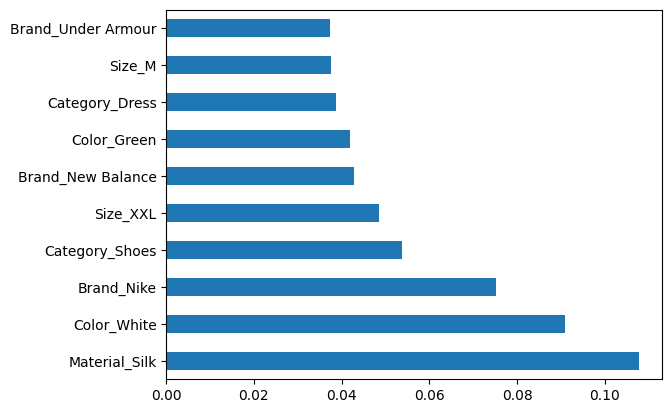

In [ ]:
# Adaboost (Boosting of multiple Decision Trees)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Choosing Decision Tree with 6 level as the weak learner
DTR=DecisionTreeRegressor(max_depth=3)
RegModel = AdaBoostRegressor(n_estimators=100, base_estimator=DTR ,learning_rate=0.04)

# Printing all the parameters of Adaboost
print(RegModel)

# Creating the model on Training Data
AB=RegModel.fit(X_train,y_train)
prediction=AB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, AB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=CategoricalPredictorList)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=CategoricalPredictorList)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)
R2 Value: 0.3162134605182447

##### Model Validation and Accuracy Calculations ##########
   Brand_Adidas  Brand_New Balance  Brand_Nike  Brand_Puma  Brand_Reebok  \
0           0.0                0.0         0.0         0.0           0.0   
1     

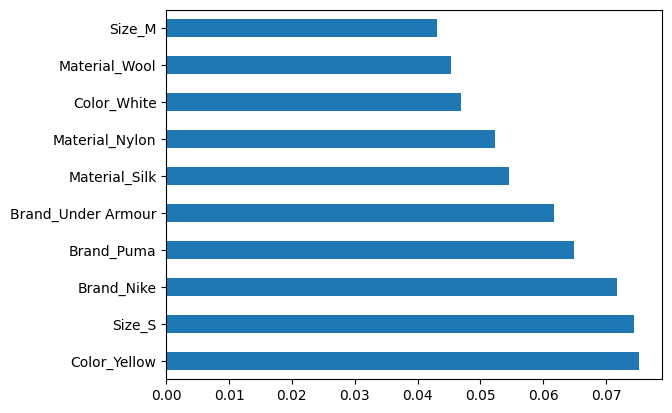

In [ ]:
##XGBoost
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2,
                      learning_rate=0.1,
                      n_estimators=1000,
                      objective='reg:linear',
                      booster='gbtree')

# Printing all the parameters of XGBoost
print(RegModel)

# Creating the model on Training Data
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, XGB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=CategoricalPredictorList)
feature_importances.nlargest(10).plot(kind='barh')
###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=CategoricalPredictorList)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])


MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

In [ ]:
#kNN
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=3)

# Printing all the parameters of KNN
print(RegModel)

# Creating the model on Training Data
KNN=RegModel.fit(X_train,y_train)
prediction=KNN.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, KNN.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The variable importance chart is not available for KNN

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=CategoricalPredictorList)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

KNeighborsRegressor(n_neighbors=3)
R2 Value: 0.3435829034903999

##### Model Validation and Accuracy Calculations ##########
   Brand_Adidas  Brand_New Balance  Brand_Nike  Brand_Puma  Brand_Reebok  \
0           0.0                0.0         0.0         0.0           0.0   
1           0.0                1.0         0.0         0.0           0.0   
2           0.0                0.0         0.0         0.0           1.0   
3           0.0                0.0         1.0         0.0           0.0   
4           0.0                1.0         0.0         0.0           0.0   

   Brand_Under Armour  Category_Dress  Category_Jacket  Category_Jeans  \
0                 1.0             1.0              0.0             0.0   
1                 0.0             1.0              0.0             0.0   
2                 0.0             0.0              1.0             0.0   
3                 0.0             0.0              0.0             0.0   
4                 0.0             0.0           

To be expected, the independent variables only have 6 categorys each. Therefore, there are not enough categories to treat the data as continuous. Thus, the average accuracy of the model is very low.

## Random Tree Algorithm

In [ ]:
# Convert to numpy array
clothesDataArray = np.array(clothesDataNumeric)
X_train.shape


(700, 30)

Creating a baseline to test the algorithm on. If we can't beat the baseline, then the algorithm sucks

In [ ]:
# The baseline predictions are the historical averages
baseline_preds = X_train[:, CategoricalPredictorList.index('Brand_Adidas')]
# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - y_train)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))

Average baseline error:  104.34


In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train);

In [ ]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 49.89 degrees.


A huge improvement; the baseline error has been effectively halved but the model has a high degree of error



In [ ]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 15.07 %.


In [ ]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = CategoricalPredictorList, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

In [ ]:
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(X_train, y_train)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = CategoricalPredictorList, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

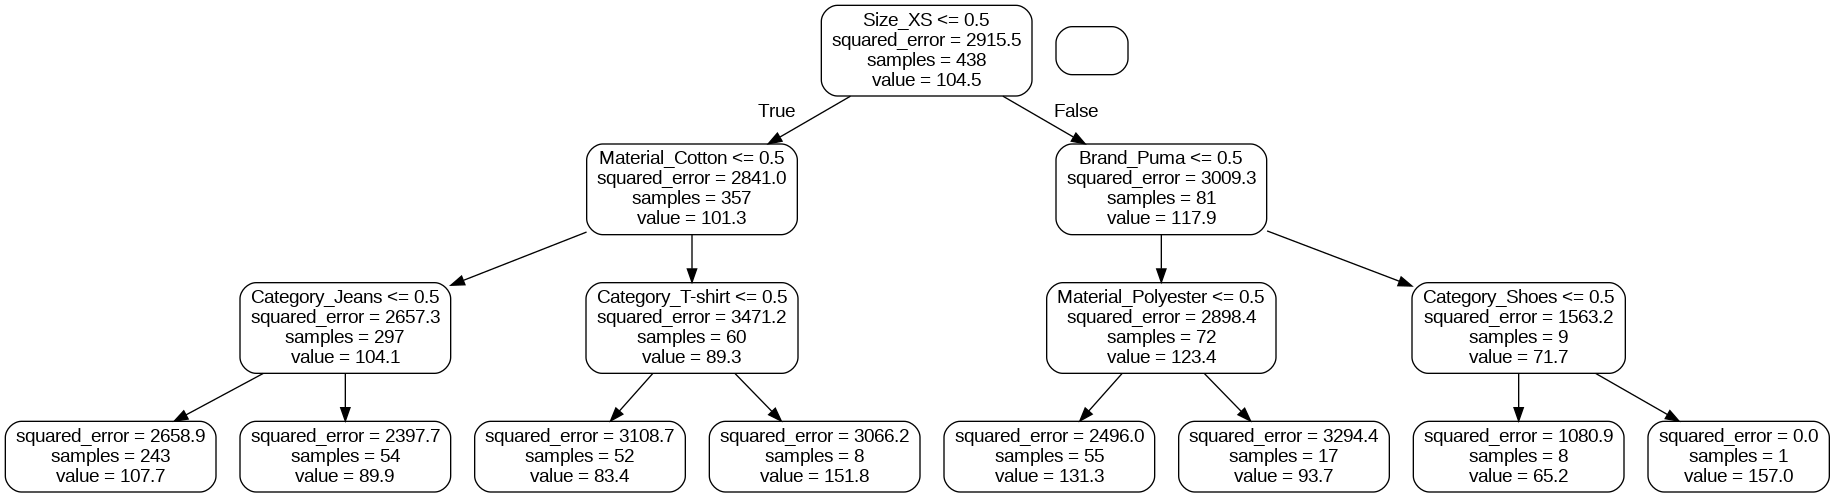

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()
dtree.fit(X_train, y_train)
predictions = rf.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 28.59 degrees.
Accuracy: 36.56 %.
